# Retailrocket EDA

First off: What files do we have?

首先，看一下我们有哪些数据。

In [1]:
##USE IN GOOGLE COLAB For support of library without interuption... 

Not very big data.

数据不算太大。

In [2]:
import datetime

import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import numpy as np
import pandas as pd
import seaborn as sns
from lightfm import LightFM
from lightfm.evaluation import auc_score
from scipy.sparse import coo_matrix
from sklearn import preprocessing

sns.set()

c:\program files\python36\lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn('LightFM was compiled without OpenMP support. '


Let'us do an Exploratory Data Analysis (EDA)

## Events

Users' click stream data

In [3]:
events = pd.read_csv('./events/events.csv')
print('Shape:', events.shape)
print('Columns', events.columns.tolist())
events.head()

Shape: (2756101, 5)
Columns ['timestamp', 'visitorid', 'event', 'itemid', 'transactionid']


,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [4]:
# users = pd.Series(events.visitorid.unique()).sample(30).values
result = set()
count = 0
list(map(lambda x: result.add(x.visitorid) if len(result)<30 and sum(events.visitorid == x.visitorid) > 50 else None, events.itertuples()))
# sum(events.visitorid == 257597) > 3

KeyboardInterrupt: 

In [6]:
result = set([53842, 163561, 316850, 388556, 556819, 710338, 935325, 2326,
 53842,
 54791,
 98499,
 132676,
 138131,
 163561,
 165839,
 183677,
 254328,
 311205,
 316850,
 348951,
 367987,
 388556,
 391066,
 471519,
 556819,
 591869,
 639414,
 653779,
 710338,
 868541,
 935325,
 1012043,
 1086719,
 1216141,
 1222911,
 1348163,
 1377305])
len(result)

30

In [7]:
new_data = events[events.visitorid.isin(result)]

In [8]:
mapping = {}
for res, x in enumerate(result):
    mapping[x] = res
mapping

{54791: 0,
 1216141: 1,
 556819: 2,
 138131: 3,
 2326: 4,
 348951: 5,
 1377305: 6,
 391066: 7,
 935325: 8,
 311205: 9,
 591869: 10,
 316850: 11,
 639414: 12,
 868541: 13,
 710338: 14,
 98499: 15,
 132676: 16,
 1222911: 17,
 1348163: 18,
 1012043: 19,
 388556: 20,
 165839: 21,
 53842: 22,
 653779: 23,
 471519: 24,
 163561: 25,
 367987: 26,
 254328: 27,
 183677: 28,
 1086719: 29}

In [9]:
mapping1 = {}
for res, x in enumerate(pd.Series(new_data.itemid.unique()).values):
    mapping1[x] = res
len(mapping1)

4955

In [10]:
new_data['visitorid'] = new_data.visitorid.map(mapping)
new_data['itemid'] = new_data.itemid.map(mapping1)

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
new_data = pd.read_csv('shivam_loves_nikita_chaturvedi.csv')
new_data = new_data.drop(['Unnamed: 0', 'transactionid'], axis = 1)
new_data.head(n=5)
print(pd.unique(new_data.event))

['addtocart' 'view' 'transaction']


In [21]:
# new_data.event = 
new_data['event'] = new_data.event.map({'addtocart':0, 'view':1 ,'transaction':2})
new_data.head()

,timestamp,visitorid,event,itemid
0,1433175895575,3,0,0
1,1433171913082,20,1,1
2,1433202686359,11,1,2
3,1433208599257,3,1,3
4,1433208420263,3,1,4


In [26]:
data.values.shape

(11337, 4)

In [23]:
data = new_data

ValueError: 'explode' must be of length 'x'

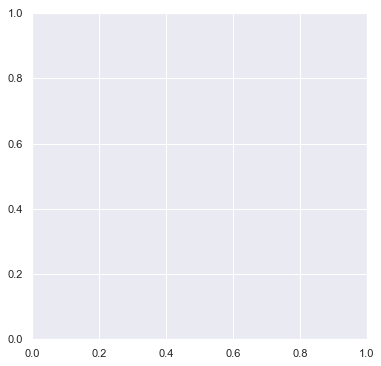

In [28]:
labels = data.index
sizes = data.values
explode = (0, 0.1, 0.2, 0.3)
fig, ax = plt.subplots(figsize=(6,6))
colors = ['b', 'g', 'r']

patches, texts, autotexts = ax.pie(sizes, labels=labels, explode=explode, autopct='%1.2f%%', shadow=False, startangle=90, colors=colors)

properties = fm.FontProperties()
properties.set_size('x-large')
# font size include: xx-small, x-small, small, medium, large, x-large, xx-large, larger, smaller, None

plt.setp(autotexts, fontproperties=properties)
plt.setp(texts, fontproperties=properties)

ax.axis('equal')
plt.show()

## Items
Unique id of the item

In [29]:
items = events.itemid.value_counts()
for i in [2, 10, 50, 100, 1000]:
    print(f'Items that appear less than {i:>4} times:\
          {round((items < i).mean() * 100, 2)}%')

items.head(10)

Items that appear less than    2 times:          31.31%
Items that appear less than   10 times:          76.55%
Items that appear less than   50 times:          95.25%
Items that appear less than  100 times:          98.2%
Items that appear less than 1000 times:          99.98%


187946    3412
461686    2978
5411      2334
370653    1854
219512    1800
257040    1647
298009    1642
96924     1633
309778    1628
384302    1608
Name: itemid, dtype: int64

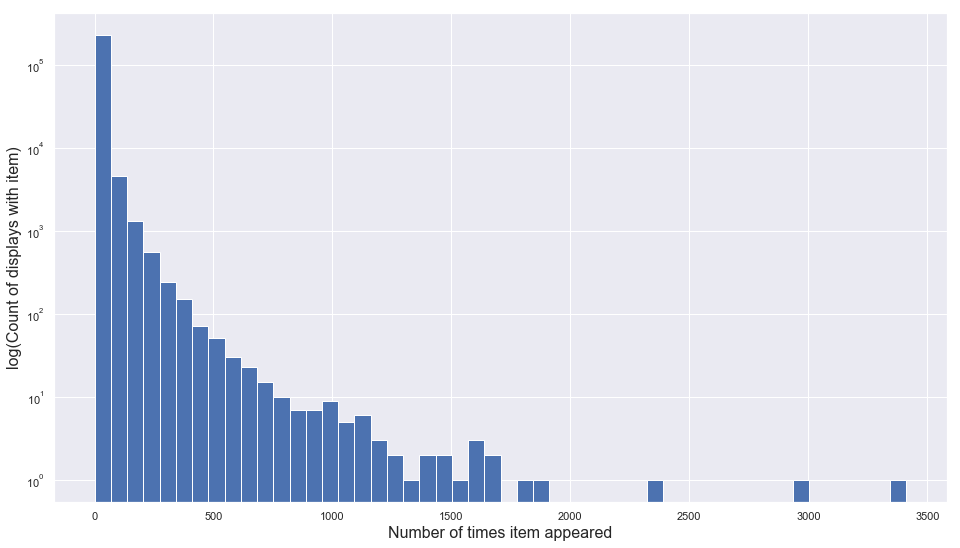

In [30]:
plt.figure(figsize=(16, 9))
plt.hist(items.values, bins=50, log=True)
plt.xlabel('Number of times item appeared', fontsize=16)
plt.ylabel('log(Count of displays with item)', fontsize=16)
plt.show()

## Visitors

In [31]:
visitors = events.visitorid.value_counts()
for i in [2, 5, 10, 15]:
    print(f'Visitors that appear less than {i:>2} times:\
          {round((visitors < i).mean() * 100, 2):.02f}%')

visitors.head(10)

Visitors that appear less than  2 times:          71.15%
Visitors that appear less than  5 times:          94.20%
Visitors that appear less than 10 times:          98.35%
Visitors that appear less than 15 times:          99.20%


1150086    7757
530559     4328
152963     3024
895999     2474
163561     2410
371606     2345
286616     2252
684514     2246
892013     2024
861299     1991
Name: visitorid, dtype: int64

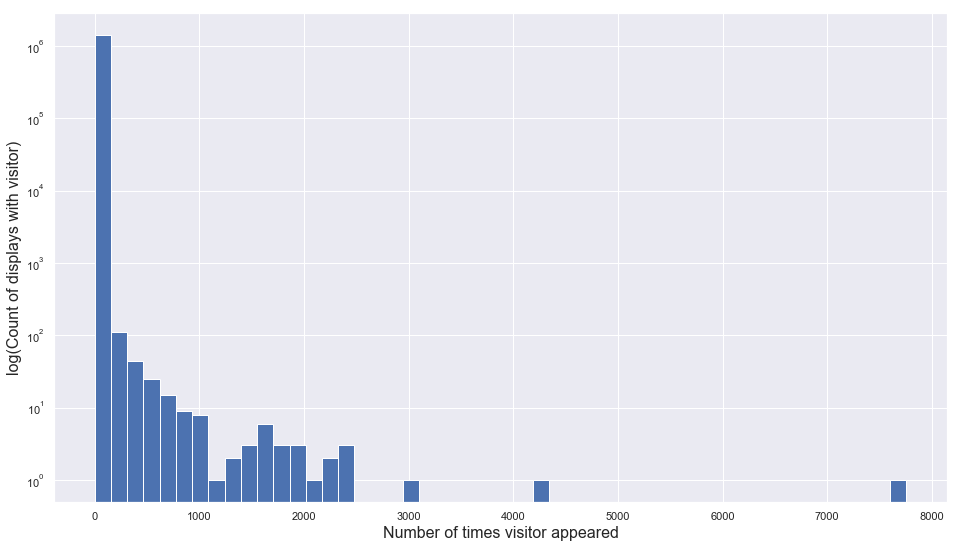

In [32]:
plt.figure(figsize=(16, 9))
plt.hist(visitors.values, bins=50, log=True)
plt.xlabel('Number of times visitor appeared', fontsize=16)
plt.ylabel('log(Count of displays with visitor)', fontsize=16)
plt.show()

In [33]:
data

,timestamp,visitorid,event,itemid
0,1433175895575,3,0,0
1,1433171913082,20,1,1
2,1433202686359,11,1,2
3,1433208599257,3,1,3
4,1433208420263,3,1,4
5,1433151755914,29,1,5
6,1433151759810,29,1,6
7,1433143285999,9,1,7
8,1433148445966,9,1,8
9,1433195653390,3,1,9


## Timestamp

In [34]:
hour = lambda x: (datetime.datetime.fromtimestamp(x)-datetime.timedelta(hours=5)).hour
timestamp = events[['timestamp', 'event']].copy()
timestamp['timestamp'] = timestamp.timestamp / 1000
timestamp['hour'] = timestamp['timestamp'].apply(hour)

timestamp.head()

,timestamp,event,hour
0,1.433221e+09,view,5
1,1.433224e+09,view,6
2,1.433222e+09,view,5
3,1.433222e+09,view,5
4,1.433221e+09,view,5


##The timestamp is UTC standard time, while the US 48 states have four time zones UTC-5 to UTC-8, assuming a UTC-5 time zone.


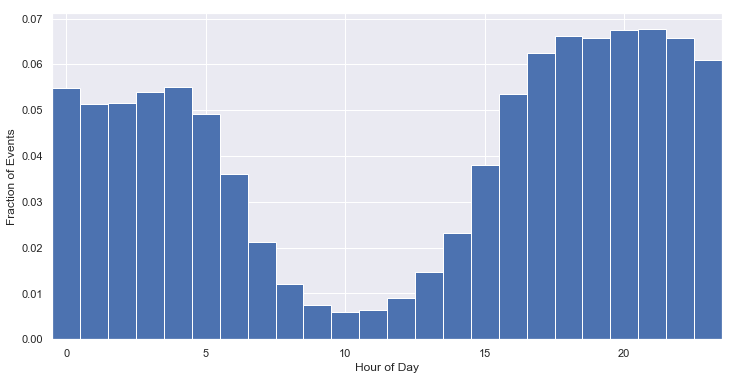

In [35]:
plt.figure(figsize=(12,6))
timestamp.hour.hist(bins=np.linspace(-0.5, 23.5, 25), alpha=1, density=True)
plt.xlim(-0.5, 23.5)
plt.xlabel("Hour of Day")
plt.ylabel("Fraction of Events")
plt.show()

##The time of viewing, adding to cart, purchasing, etc. is basically in line with daily routine.

## Item Properties

In [36]:
properties = pd.concat([pd.read_csv('./item_properties_part1/item_properties_part1.csv'), pd.read_csv('./item_properties_part2/item_properties_part2.csv')])
print('Shape:', properties.shape)
print('Columns', properties.columns.tolist())
properties.head()

Shape: (20275902, 4)
Columns ['timestamp', 'itemid', 'property', 'value']


,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


All of them had been hashed excluding "categoryid" and "available", so most of the data doesn't make sense.

In [37]:
properties = properties.loc[properties.property.isin(['categoryid', 'available']), :]
print('Shape:', properties.shape)
properties.head()

Shape: (2291853, 4)


,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
5,1436065200000,285026,available,0
15,1437274800000,186518,available,0
79,1433646000000,423682,available,0
82,1434250800000,316253,available,1


In [38]:
categoryid = properties[properties.property=='categoryid'].drop_duplicates('itemid', keep='first')
available = properties[properties.property=='available']

In [39]:
categoryid.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
140,1432436400000,281245,categoryid,1277
151,1435460400000,35575,categoryid,1059
189,1437274800000,8313,categoryid,1147
197,1437879600000,55102,categoryid,47


##My understanding is that the category corresponding to the product, the similar products can be recommended.

In [40]:
categories = categoryid.value.value_counts()
categories.head(10)

342     17231
769     10982
173     10561
1301    10021
1007     9738
1142     6822
1680     6019
1250     5193
1070     4209
1483     3893
Name: value, dtype: int64

In [41]:
for i in [2, 10, 50, 100, 500, 1000, 5000]:
    print(f'Categories that appear less than {i:>4} times:\
          {round((categories < i).mean() * 100, 2)}%')

Categories that appear less than    2 times:          7.1%
Categories that appear less than   10 times:          21.8%
Categories that appear less than   50 times:          42.61%
Categories that appear less than  100 times:          56.0%
Categories that appear less than  500 times:          84.57%
Categories that appear less than 1000 times:          91.84%
Categories that appear less than 5000 times:          99.35%


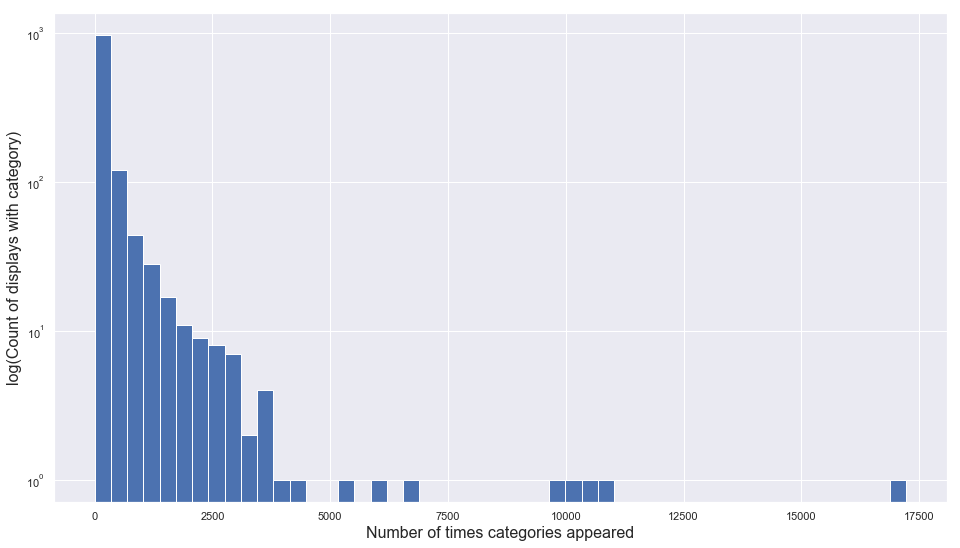

In [42]:
plt.figure(figsize=(16, 9))
plt.hist(categories.values, bins=50, log=True)
plt.xlabel('Number of times categories appeared', fontsize=16)
plt.ylabel('log(Count of displays with category)', fontsize=16)
plt.show()

In [43]:
item_category = categoryid[['itemid', 'value']]
item_category.columns = ['itemid', 'categoryid']
item_category.head()

,itemid,categoryid
0,460429,1338
140,281245,1277
151,35575,1059
189,8313,1147
197,55102,47


In [44]:
available.head()

,timestamp,itemid,property,value
5,1436065200000,285026,available,0
15,1437274800000,186518,available,0
79,1433646000000,423682,available,0
82,1434250800000,316253,available,1
96,1437274800000,430459,available,0


##category tree

In [45]:
category = pd.read_csv('category_tree.csv').dropna()
print('Shape:', category.shape)
print('Columns', category.columns.tolist())
category.head()

Shape: (1644, 2)
Columns ['categoryid', 'parentid']


,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


In [46]:
category_parent_dict = category.set_index('categoryid').T.to_dict('list')

pd.options.mode.chained_assignment = None
item_category['parentid'] = item_category.categoryid.apply(lambda x: int(category_parent_dict.get(int(x), [x])[0]))

item_category.head()

,itemid,categoryid,parentid
0,460429,1338,1278
140,281245,1277,312
151,35575,1059,1696
189,8313,1147,1027
197,55102,47,381


In [48]:
events.columns

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
5,1433224086234,972639,view,22556,NaN
6,1433221923240,810725,view,443030,NaN
7,1433223291897,794181,view,439202,NaN
8,1433220899221,824915,view,428805,NaN
9,1433221204592,339335,view,82389,NaN


Here, we got the relationship of **itemid - categoryid - parentid**.

## Modeling by LightFM

In [49]:
data.columns

Index(['timestamp', 'visitorid', 'event', 'itemid'], dtype='object')

In [52]:
# Format the timestamp as a date and arrange it in chronological order. 
events = data.assign(date=pd.Series(datetime.datetime.fromtimestamp(i/1000).date() for i in data.timestamp))
events = data.sort_values('timestamp').reset_index(drop=True)
events = data[['visitorid','itemid','event', 'timestamp']]

In [53]:
events.head()

,visitorid,itemid,event,timestamp
0,3,0,0,1433175895575
1,20,1,1,1433171913082
2,11,2,1,1433202686359
3,3,3,1,1433208599257
4,3,4,1,1433208420263


In [55]:
events.tail()

,visitorid,itemid,event,timestamp
11332,11,1180,1,1438382213296
11333,11,1143,1,1438377152791
11334,11,4954,1,1438398560816
11335,11,1270,1,1438376483619
11336,11,1269,1,1438376163750


In [81]:
id_cols=['visitorid','itemid']
transform = events
for k in id_cols:
    cate_enc=preprocessing.LabelEncoder()
    transform[k]=cate_enc.fit_transform(events[k].values)
#     trans_cat_test[k]=cate_enc.transform(x_test[k].values)

In [83]:
transform.values

array([[            3,             0,             0, 1433175895575],
       [           20,             1,             1, 1433171913082],
       [           11,             2,             1, 1433202686359],
       ...,
       [           11,          4954,             1, 1438398560816],
       [           11,          1270,             1, 1438376483619],
       [           11,          1269,             1, 1438376163750]],
      dtype=int64)



Since the calculation is time consuming, I am not going to use all the data.

In [57]:
start_date = '2015-5-3'
end_date = '2015-5-18'
fd = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').date()
events = events[(events.timestamp >= fd(start_date)) & (events.timestamp <= fd(end_date))]

TypeError: '>=' not supported between instances of 'int' and 'datetime.date'

In [ ]:
# Divide training sets and test sets
split_point = np.int(np.round(events.shape[0]*0.8))
events_train = events.iloc[0:split_point]   ##train data
events_test = events.iloc[split_point::] ## test data down
events_test = events_test[(events_test['visitorid'].isin(events_train['visitorid'])) & (events_test['itemid'].isin(events_train['itemid']))]

In [80]:
id_cols=['visitorid','itemid']
trans_cat_train=dict()
trans_cat_test=dict()

for k in id_cols:
    cate_enc=preprocessing.LabelEncoder()
    trans_cat_train[k]=cate_enc.fit_transform(x_train[k].values)
    trans_cat_test[k]=cate_enc.transform(x_test[k].values)

ValueError: y contains new labels: [  31   43   75   80   85   96  119  121  148  159  166  167  187  192
  200  201  202  206  236  266  286  297  304  316  341  342  346  347
  356  358  361  363  364  378  385  390  399  402  409  425  434  455
  484  485  490  504  509  525  526  536  550  557  560  581  594  600
  601  602  605  615  621  622  629  636  647  653  686  687  701  710
  713  717  725  744  747  753  756  774  782  792  800  801  808  824
  829  861  864  886  896  911  915  918  952  956  963  996  998 1009
 1027 1031 1033 1037 1038 1058 1069 1073 1080 1084 1088 1104 1106 1107
 1115 1116 1120 1124 1168 1176 1183 1184 1186 1192 1194 1196 1207 1208
 1211 1212 1213 1216 1218 1228 1230 1237 1239 1263 1264 1279 1280 1285
 1292 1293 1295 1308 1321 1322 1325 1326 1333 1353 1366 1371 1374 1376
 1379 1385 1386 1390 1392 1400 1402 1412 1417 1418 1421 1425 1435 1461
 1483 1491 1492 1503 1504 1508 1512 1544 1547 1561 1563 1582 1600 1601
 1608 1646 1669 1679 1683 1690 1695 1702 1713 1716 1723 1737 1749 1766
 1772 1776 1786 1800 1820 1832 1837 1843 1847 1849 1857 1858 1867 1868
 1871 1880 1882 1893 1895 1896 1902 1918 1920 1927 1937 1940 1947 1953
 1964 1966 1967 1976 1991 1994 2000 2025 2028 2031 2035 2041 2042 2052
 2061 2066 2070 2082 2084 2089 2111 2123 2124 2125 2132 2140 2147 2168
 2169 2171 2180 2186 2198 2213 2218 2220 2224 2245 2247 2248 2251 2255
 2264 2276 2278 2280 2285 2301 2315 2326 2331 2334 2348 2357 2361 2370
 2371 2374 2378 2381 2382 2384 2390 2412 2417 2420 2452 2467 2480 2486
 2498 2513 2519 2526 2532 2537 2539 2549 2564 2574 2576 2579 2584 2589
 2607 2615 2617 2626 2632 2633 2634 2639 2642 2651 2652 2655 2673 2676
 2683 2686 2696 2709 2710 2720 2732 2737 2748 2749 2752 2754 2757 2760
 2761 2769 2775 2779 2790 2805 2810 2813 2817 2829 2831 2843 2846 2852
 2854 2862 2865 2872 2877 2894 2898 2910 2913 2918 2927 2930 2937 2939
 2946 2951 2963 2969 2974 2988 2994 2998 3005 3010 3022 3050 3064 3069
 3074 3079 3086 3095 3105 3107 3109 3117 3125 3128 3153 3164 3166 3173
 3181 3182 3183 3205 3213 3215 3217 3218 3222 3233 3239 3241 3244 3248
 3249 3250 3261 3263 3268 3276 3279 3281 3294 3303 3308 3314 3329 3332
 3336 3337 3371 3380 3386 3394 3404 3412 3419 3425 3434 3437 3456 3472
 3478 3479 3484 3491 3498 3502 3518 3525 3529 3533 3538 3569 3572 3573
 3581 3586 3587 3588 3593 3596 3597 3601 3605 3620 3624 3627 3640 3645
 3653 3654 3657 3665 3666 3669 3678 3681 3682 3685 3691 3700 3702 3710
 3713 3714 3726 3728 3734 3736 3737 3740 3747 3749 3750 3754 3762 3768
 3769 3772 3776 3777 3787 3797 3798 3800 3807 3809 3813 3816 3817 3830
 3832 3833 3837 3841 3846 3847 3851 3857 3858 3862 3863 3864 3865 3871
 3878 3902 3906 3908 3921 3934 3935 3936 3937 3942 3947 3950 3975 3980
 3987 3988 3993 3995 3999 4001 4011 4013 4015 4025 4031 4034 4036 4042
 4044 4052 4059 4062 4071 4072 4077 4078 4079 4083 4093 4102 4105 4118
 4122 4126 4127 4129 4133 4138 4158 4159 4190 4194 4206 4208 4209 4213
 4215 4216 4217 4222 4230 4232 4268 4278 4282 4287 4289 4294 4295 4304
 4320 4322 4330 4333 4347 4368 4380 4383 4384 4388 4391 4395 4399 4405
 4407 4409 4413 4416 4427 4443 4447 4449 4465 4480 4483 4488 4502 4503
 4524 4529 4537 4539 4540 4543 4557 4561 4567 4568 4570 4571 4581 4587
 4595 4596 4598 4600 4607 4608 4620 4622 4626 4633 4636 4642 4647 4651
 4653 4655 4669 4672 4674 4680 4682 4690 4692 4695 4699 4701 4711 4729
 4734 4744 4747 4749 4750 4752 4755 4758 4760 4771 4775 4792 4805 4820
 4823 4835 4840 4844 4877 4905 4910 4911 4913 4916 4922 4924 4931 4934
 4939 4943 4948]

In [96]:
dfx = pd.read_csv('new_clean_data.csv')
dfx = dfx.drop(['Unnamed: 0','transactionid'], axis = 1)
dfx.head()

,timestamp,visitorid,event,itemid
0,1433175895575,3,addtocart,0
1,1433171913082,20,view,1
2,1433202686359,11,view,2
3,1433208599257,3,view,3
4,1433208420263,3,view,4


In [97]:
print(pd.unique(dfx.event))
dfx.event = dfx.event.map({'addtocart':0, 'view':1, 'transaction':2})
dfx.head()

['addtocart' 'view' 'transaction']


,timestamp,visitorid,event,itemid
0,1433175895575,3,0,0
1,1433171913082,20,1,1
2,1433202686359,11,1,2
3,1433208599257,3,1,3
4,1433208420263,3,1,4


In [98]:
transform = dfx
transform_y = transform.event
print(transform_y.head(n=4))
#print(dfy[0])
transform_x = transform.drop(['event'], axis = 1)
transform_x.head()

0    0
1    1
2    1
3    1
Name: event, dtype: int64


,timestamp,visitorid,itemid
0,1433175895575,3,0
1,1433171913082,20,1
2,1433202686359,11,2
3,1433208599257,3,3
4,1433208420263,3,4


In [99]:
from sklearn.model_selection import train_test_split

In [69]:
train_test_split?
'''dfy and df1 have events'''

'dfy and df1 have events'

In [77]:
x_train, x_test, y_train, y_test = train_test_split(dfx,dfy,random_state = 40, test_size = 0.2, shuffle = True)
x_train.columns

Index(['timestamp', 'visitorid', 'itemid'], dtype='object')

In [100]:
x_train, x_test, y_train, y_test = train_test_split(transform_x,transform_y,random_state = 40, test_size = 0.2, shuffle = True)
x_train.columns

Index(['timestamp', 'visitorid', 'itemid'], dtype='object')

In [101]:
ratings = dict()

# cate_enc=preprocessing.LabelEncoder()
# ratings['train'] = cate_enc.fit_transform(y_train)
# ratings['test'] = cate_enc.transform(y_test)
ratings['train'] = y_train
ratings['test'] = y_test

In [106]:
# n_users=len(np.unique(x_train['visitorid']))
# n_items=len(np.unique(x_train['itemid']))
# n_users_test=len(np.unique(x_test['visitorid']))
# n_items_test=len(np.unique(x_test['itemid']))
n_users=len(x_train['visitorid'])
n_items=len(x_train['itemid'])
n_users_test=len(x_test['visitorid'])
n_items_test=len(x_test['itemid'])

In [105]:
rate_matrix = dict()
rate_matrix['train'] = coo_matrix((ratings['train'], (x_train['visitorid'], x_train['itemid'])), shape=(n_users,n_items))
rate_matrix['test'] = coo_matrix((ratings['test'], (x_test['visitorid'], x_test['itemid'])), shape=(n_users_test,n_items_test))

ValueError: column index exceeds matrix dimensions

In [ ]:
model = LightFM(no_components=5, loss='warp')
#model.fit(rate_matrix['train'], epochs=100, num_threads=8)   ##this will be saved in pickle


In [ ]:
from sklearn.externals import joblib
filename = 'finalized_model.sav'
joblib.dump(model, filename)
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)

In [ ]:
auc_score(model, rate_matrix['train'], num_threads=8).mean()

In [ ]:
auc_score(model, rate_matrix['test'], num_threads=8).mean()